In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

In [130]:
city = 'cali'

In [131]:
time = pd.read_csv( './data/meta/time.csv' )

In [132]:
time[ 'date' ] = pd.to_datetime( time[ 'date' ], format = '%d/%m/%Y' )

In [133]:
time.dtypes

date    datetime64[ns]
time             int64
dtype: object

In [134]:
time.tail()

,date,time
121,2020-07-13,122
122,2020-07-14,123
123,2020-07-15,124
124,2020-07-16,125
125,2020-07-17,126


In [135]:
filename = ''
if city == 'bogota':
    filename = 'BOG'
elif city == 'barranquilla':
    filename = 'BARRANQUILLA'
elif city == 'cali':
    filename = 'CALI'
    
meta = pd.read_csv( './data/meta/{}_jul18.csv'.format( filename ) )

In [136]:
del meta[ 'Unnamed: 0' ]

In [137]:
meta.shape

(1270, 11)

In [138]:
meta.dtypes

replicate      int64
time           int64
S            float64
E            float64
A            float64
I1           float64
I2           float64
I3           float64
R            float64
D            float64
obs          float64
dtype: object

In [139]:
meta.tail( 20 )

,replicate,time,S,E,A,I1,I2,I3,R,D,obs
1250,10,107,2.219194e+06,9025.492319,3521.585993,3851.156130,599.641538,162.162778,13650.152471,249.464594,254.0
1251,10,108,2.216302e+06,10015.697180,3910.506398,4276.473929,660.988039,175.291379,14492.097939,257.894268,250.0
1252,10,109,2.210086e+06,13845.834010,4466.820515,4884.851099,730.826485,190.128825,15435.195948,267.022123,234.0
1253,10,110,2.202858e+06,17905.128876,5299.729849,5795.708847,815.847200,207.040927,16531.656336,276.941562,250.0
1254,10,111,2.194226e+06,22507.091498,6408.346923,7008.076640,923.043633,226.681782,17840.562352,287.771560,316.0
1255,10,112,2.183788e+06,27918.643097,7817.395324,8548.991840,1059.199025,249.952171,19424.280489,299.670106,275.0
1256,10,113,2.171100e+06,34394.744688,9571.422342,10467.170726,1231.580618,277.983515,21353.169200,312.845994,301.0
1257,10,114,2.155661e+06,42199.557451,11732.181368,12830.145927,1448.452947,312.150132,23709.494225,327.570566,331.0
1258,10,115,2.136889e+06,51618.995030,14377.830733,15723.390274,1719.498108,354.101228,26591.043679,344.190580,352.0
1259,10,116,2.114117e+06,62966.962155,17603.058797,19250.453607,2056.192148,405.807783,30114.724635,363.143079,361.0


In [140]:
def ci( x ):
    try:
        return 1.96 * np.std( x ) / np.sqrt( len( x ) )
    except ZeroDivisionError:
        return 0

meta_grouped = meta.groupby( 'time' ).agg( { 'obs': [ 'mean', ci ] } ).reset_index().fillna( 0 )
meta_grouped.columns = [ '_'.join( col ).strip() for col in meta_grouped.columns.values ]
meta_grouped.rename( columns = { 'time_': 'time' }, inplace = True )

In [141]:
meta_grouped = meta_grouped.merge( time, how = 'left', on = 'time' )

In [142]:
meta_grouped = meta_grouped.loc[ meta_grouped[ 'date' ].notnull() ]

In [143]:
meta_grouped[ 'obs_lower' ] = meta_grouped[ 'obs_mean' ] - meta_grouped[ 'obs_ci' ]
meta_grouped[ 'obs_upper' ] = meta_grouped[ 'obs_mean' ] + meta_grouped[ 'obs_ci' ]

In [144]:
meta_grouped.head()

,time,obs_mean,obs_ci,date,obs_lower,obs_upper
1,1,0.0,0.0,2020-03-14,0.0,0.0
2,2,0.0,0.0,2020-03-15,0.0,0.0
3,3,0.0,0.0,2020-03-16,0.0,0.0
4,4,0.0,0.0,2020-03-17,0.0,0.0
5,5,0.0,0.0,2020-03-18,0.0,0.0


In [145]:
meta_grouped.tail()

,time,obs_mean,obs_ci,date,obs_lower,obs_upper
122,122,560.4,20.989761,2020-07-13,539.410239,581.389761
123,123,636.6,11.582920,2020-07-14,625.017080,648.182920
124,124,694.2,21.627248,2020-07-15,672.572752,715.827248
125,125,774.8,10.720322,2020-07-16,764.079678,785.520322
126,126,883.1,11.797344,2020-07-17,871.302656,894.897344


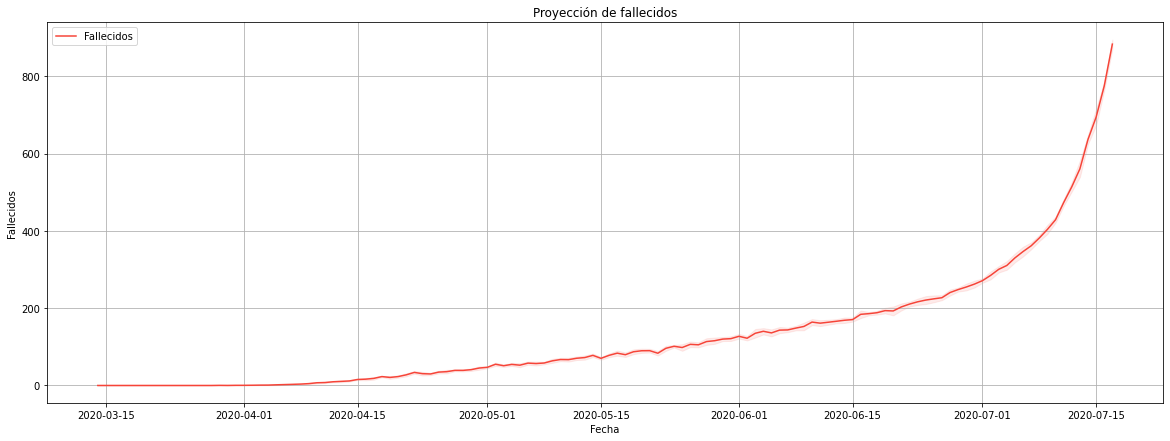

In [146]:
fig, ax = plt.subplots( figsize = ( 20, 7 ) )

ax.plot( meta_grouped[ 'date' ], meta_grouped[ 'obs_mean' ], label = 'Fallecidos', color = '#f64438' )
ax.fill_between( meta_grouped[ 'date' ], meta_grouped[ 'obs_lower' ], meta_grouped[ 'obs_upper' ], color = '#f64438', alpha = .1 )

plt.title( 'Proyección de fallecidos' )
plt.xlabel( 'Fecha' )
plt.ylabel( 'Fallecidos' )
plt.grid( True )
plt.legend()

In [147]:
meta_grouped.to_csv( './data/meta/seir_{}.csv'.format( city ), index = False )